In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import json
from datetime import datetime

In [2]:
from models.cooling_phonons_v3 import CoolingPhonons
from models.graphene_optics import GrapheneTHG

In [3]:
run_label = "density"
time_stamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
saveDir = "./data/02/%s_%s" % (time_stamp, run_label)
os.mkdir(saveDir)

In [4]:
eF_list = np.linspace(0.050, 0.400, 11)
thg_list = []

In [ ]:
for il, eF in enumerate(eF_list):
    sysparams = {
        "tempK_eq": 300.0,
        "tau_ph": 1200.0,
        "pu_fluenceSI": 100.0,
        "pu_dt": 110.0,
        "pu_eph": 1.200,
        "pr_delay": 1000.0,
        "pr_fluenceSI": 110.0,
        "pr_dt": 150.0,
        "pr_eph": 0.320,
        "nsub": 1.45,
        "ntop": 1.0,
        "eF": eF
    }
    dyn = CoolingPhonons(**sysparams)
    runparams = {
        "tmax": (sysparams["pr_delay"] + sysparams["pr_dt"] * 2.0),
        "tnum": 101,
        "dt_approx": 10.0,
        "print_time": False    
    }
    dyn.run(**runparams)

    with open("%s/params-%02d.json" % (saveDir, il), "w") as f:
        json.dump({"sysparams": sysparams, "runparams": runparams}, f, indent=4)

    np.savetxt("%s/dynamics-%02d.csv" % (saveDir, il), dyn.dynamics_m, delimiter=",")
    np.savetxt("%s/thg-%02d.csv" % (saveDir, il), np.c_[dyn.p["pr_tt"],dyn.p["etaTHG"]], delimiter=",")
    thg_list.append((eF, dyn.p["etaTHG_avg"], dyn.p["etaTHG_max"]))

thg_list = np.array(thg_list)
np.savetxt("%s/thg_vs_density.csv" % saveDir, thg_list, delimiter=",")

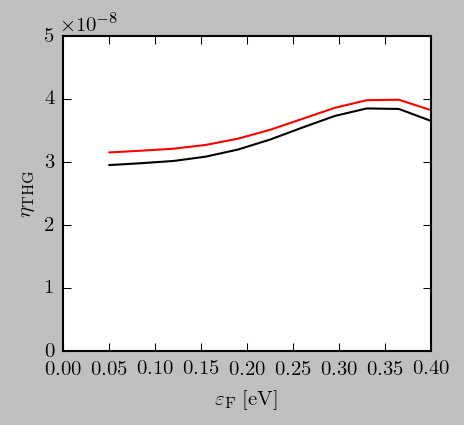

In [8]:
mpl.style.use(["classic", "latex"])
fig = plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
plt.plot(thg_list[:,0], thg_list[:,1], "-k")
plt.plot(thg_list[:,0], thg_list[:,2], "-r")
plt.xlim([0.0, 0.4])
plt.ylim([0.0, 5.0e-8])
plt.xlabel(r"$\varepsilon_{\rm F}~[{\rm eV}]$")
plt.ylabel(r"$\eta_{\rm THG}$")
fig.savefig("%s/plot_etaTHG_density.png" % saveDir, dpi=300)